In [6]:
import pandas as pd
import numpy as np
import statsmodels.api
import matplotlib as plt
import matplotlib.pyplot
from sklearn.preprocessing import LabelEncoder

In [66]:
# data read
raw_train = pd.read_csv("~/hosthome/fc_team_project2/datasets/UJIIndoorLoc/trainingData.csv")
raw_validation = pd.read_csv("~/hosthome/fc_team_project2/datasets/UJIIndoorLoc/validationData.csv")

In [67]:
raw_validation.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.917,4864889.663,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867,4864839.740,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302,4864846.534,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.825,4864842.829,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499,4864922.399,2,0,0,0,0,2,1380877774


In [68]:
raw_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.264,4864920.778,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.621,4864934.225,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.152,4864949.532,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.570,4864934.093,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.144,4864982.217,0,0,122,2,11,13,1369909710


In [70]:
nor_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,-7541.264,4864920.778,2,1,106,2,2,23,1371713733
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,-7536.621,4864934.225,2,1,106,2,2,23,1371713691
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.933,0.000,0.000,...,0.000,-7519.152,4864949.532,2,1,103,2,2,23,1371714095
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,-7524.570,4864934.093,2,1,102,2,2,23,1371713807
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,-7632.144,4864982.217,0,0,122,2,11,13,1369909710


---

In [69]:
# normalization
nor_train = raw_train.iloc[:, 0:520]/(-104)
nor_train[nor_train == -0.9615384615384616] = 0
nor_train = nor_train.join(raw_train.iloc[:, 520:])

nor_validation = raw_validation.iloc[:, 0:520]/(-104)
nor_validation[nor_validation == -0.9615384615384616] = 0
nor_validation = nor_validation.join(raw_validation.iloc[:, 520:])

---

In [15]:
# set display option
pd.set_option('display.float_format', lambda x: '%.3f' % x)

---

In [71]:
# one-hot-encoding train, test data(FLOOR)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

train_f = raw_train["FLOOR"].values
train_f = train_f.reshape(19937, 1)
train_f_c = ohe.fit(train_f)
train_f = train_f_c.transform(train_f).toarray()
train_f = pd.DataFrame(train_f, columns=["f_1", "f_2", "f_3", "f_4", "f_5"])
train_f["f_1"] = train_f["f_1"].astype(int)
train_f["f_2"] = train_f["f_2"].astype(int)
train_f["f_3"] = train_f["f_3"].astype(int)
train_f["f_4"] = train_f["f_4"].astype(int)
train_f["f_5"] = train_f["f_5"].astype(int)

validation_f = raw_validation["FLOOR"].values
validation_f = validation_f.reshape(1111, 1)
validation_f = train_f_c.transform(validation_f).toarray()
validation_f = pd.DataFrame(validation_f, columns=["f_1", "f_2", "f_3", "f_4", "f_5"])
validation_f["f_1"] = validation_f["f_1"].astype(int)
validation_f["f_2"] = validation_f["f_2"].astype(int)
validation_f["f_3"] = validation_f["f_3"].astype(int)
validation_f["f_4"] = validation_f["f_4"].astype(int)
validation_f["f_5"] = validation_f["f_5"].astype(int)


In [72]:
# one-hot-encoding train, test data(BUILDINGID)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

train_b = raw_train["BUILDINGID"].values
train_b = train_b.reshape(19937, 1)
train_b_c = ohe.fit(train_b)
train_b = train_b_c.transform(train_b).toarray()
train_b = pd.DataFrame(train_b, columns=["b_1", "b_2", "b_3"])
train_b["b_1"] = train_b["b_1"].astype(int)
train_b["b_2"] = train_b["b_2"].astype(int)
train_b["b_3"] = train_b["b_3"].astype(int)

validation_b = raw_validation["BUILDINGID"].values
validation_b = validation_b.reshape(1111, 1)
validation_b = train_b_c.transform(validation_b).toarray()
validation_b = pd.DataFrame(validation_b, columns=["b_1", "b_2", "b_3"])
validation_b["b_1"] = validation_b["b_1"].astype(int)
validation_b["b_2"] = validation_b["b_2"].astype(int)
validation_b["b_3"] = validation_b["b_3"].astype(int)

In [73]:
# one-hot-encoding train, test data(PHONEID)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

train_p = raw_train["PHONEID"].values
train_p = train_p.reshape(19937 , 1)
train_p_c = ohe.fit(train_p)
train_p = train_p_c.transform(train_p).toarray()
train_p = pd.DataFrame(train_p, columns=["p_1", "p_2", "p_3", "p_4", "p_5", "p_6", "p_7", "p_8", "p_9", "p_10", "p_11", "p_12", "p_13", "p_14", "p_15", "p_16"])
train_p = train_p[:].astype(int)

validation_p = raw_validation["PHONEID"].values
validation_p = validation_p.reshape(1111 , 1)
validation_p = train_p_c.transform(validation_p).toarray()
validation_p = pd.DataFrame(validation_p, columns=["p_1", "p_2", "p_3", "p_4", "p_5", "p_6", "p_7", "p_8", "p_9", "p_10", "p_11", "p_12", "p_13", "p_14", "p_15", "p_16"])
validation_p = validation_p[:].astype(int)

In [82]:
# train
##train_y = nor_train["LONGITUDE"]
train_y = nor_train.loc[:, ("LONGITUDE", "LATITUDE")]
train_x = nor_train.iloc[:, 0:520]
train_x = train_x.join(train_f)
train_x = train_x.join(train_b)
#train_x = train_x.join(train_p)
##train_x = sm.add_constant(train_x)

model_1 = sm.OLS(train_y, train_x).fit()


In [83]:
# test
validation_x = nor_validation.iloc[:, 0:520]
validation_x = validation_x.join(validation_f)
validation_x = validation_x.join(validation_b)
#validation_x = validation_x.join(validation_p)
##validation_x = sm.add_constant(validation_x)

validation_y = model_1.predict(validation_x)
validation_y

,0,1
0,-7477.432,4864883.602
1,-7363.459,4864843.234
2,-7367.809,4864840.270
3,-7354.857,4864841.150
4,-7635.965,4864923.452
5,-7314.743,4864820.907
6,-7360.969,4864848.011
7,-7363.927,4864778.768
8,-7358.941,4864778.118
9,-7344.185,4864823.738


In [76]:
len(validation_y[validation_y/raw_validation["LONGITUDE"] <-1])


1111

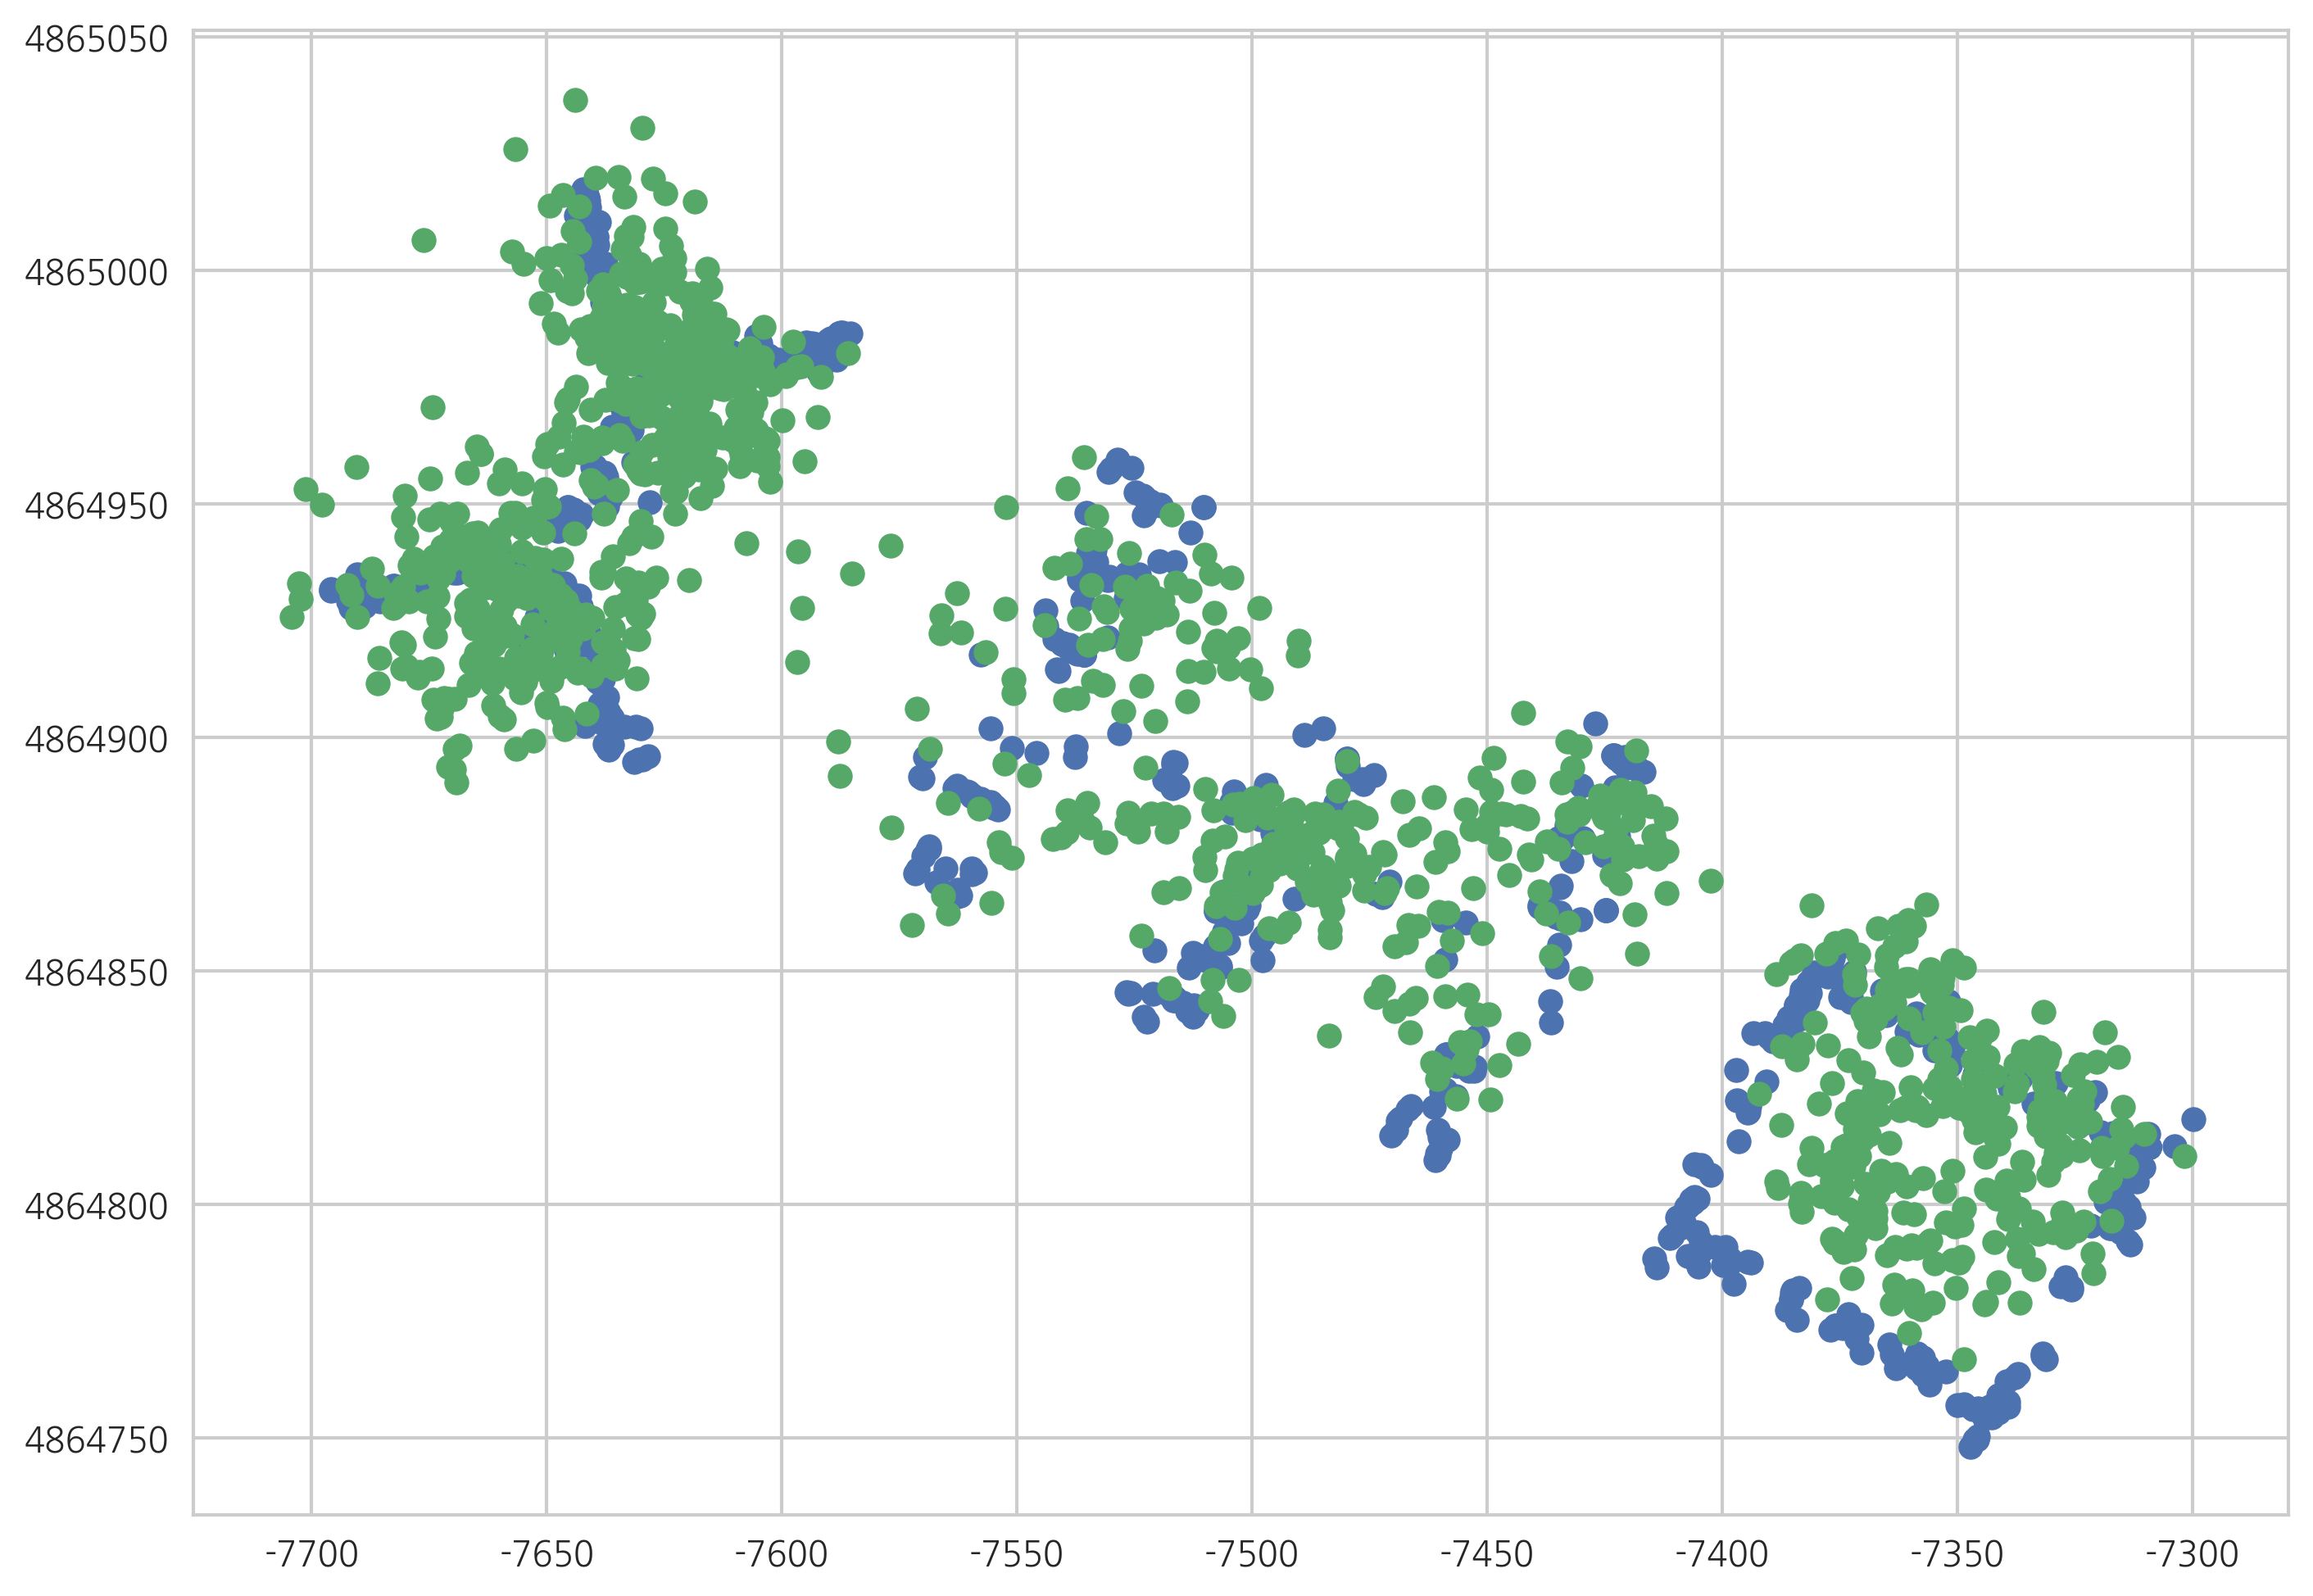

In [84]:
plt.scatter(raw_validation["LONGITUDE"], raw_validation["LATITUDE"])
plt.scatter(validation_y[0], validation_y[1])
plt.show()

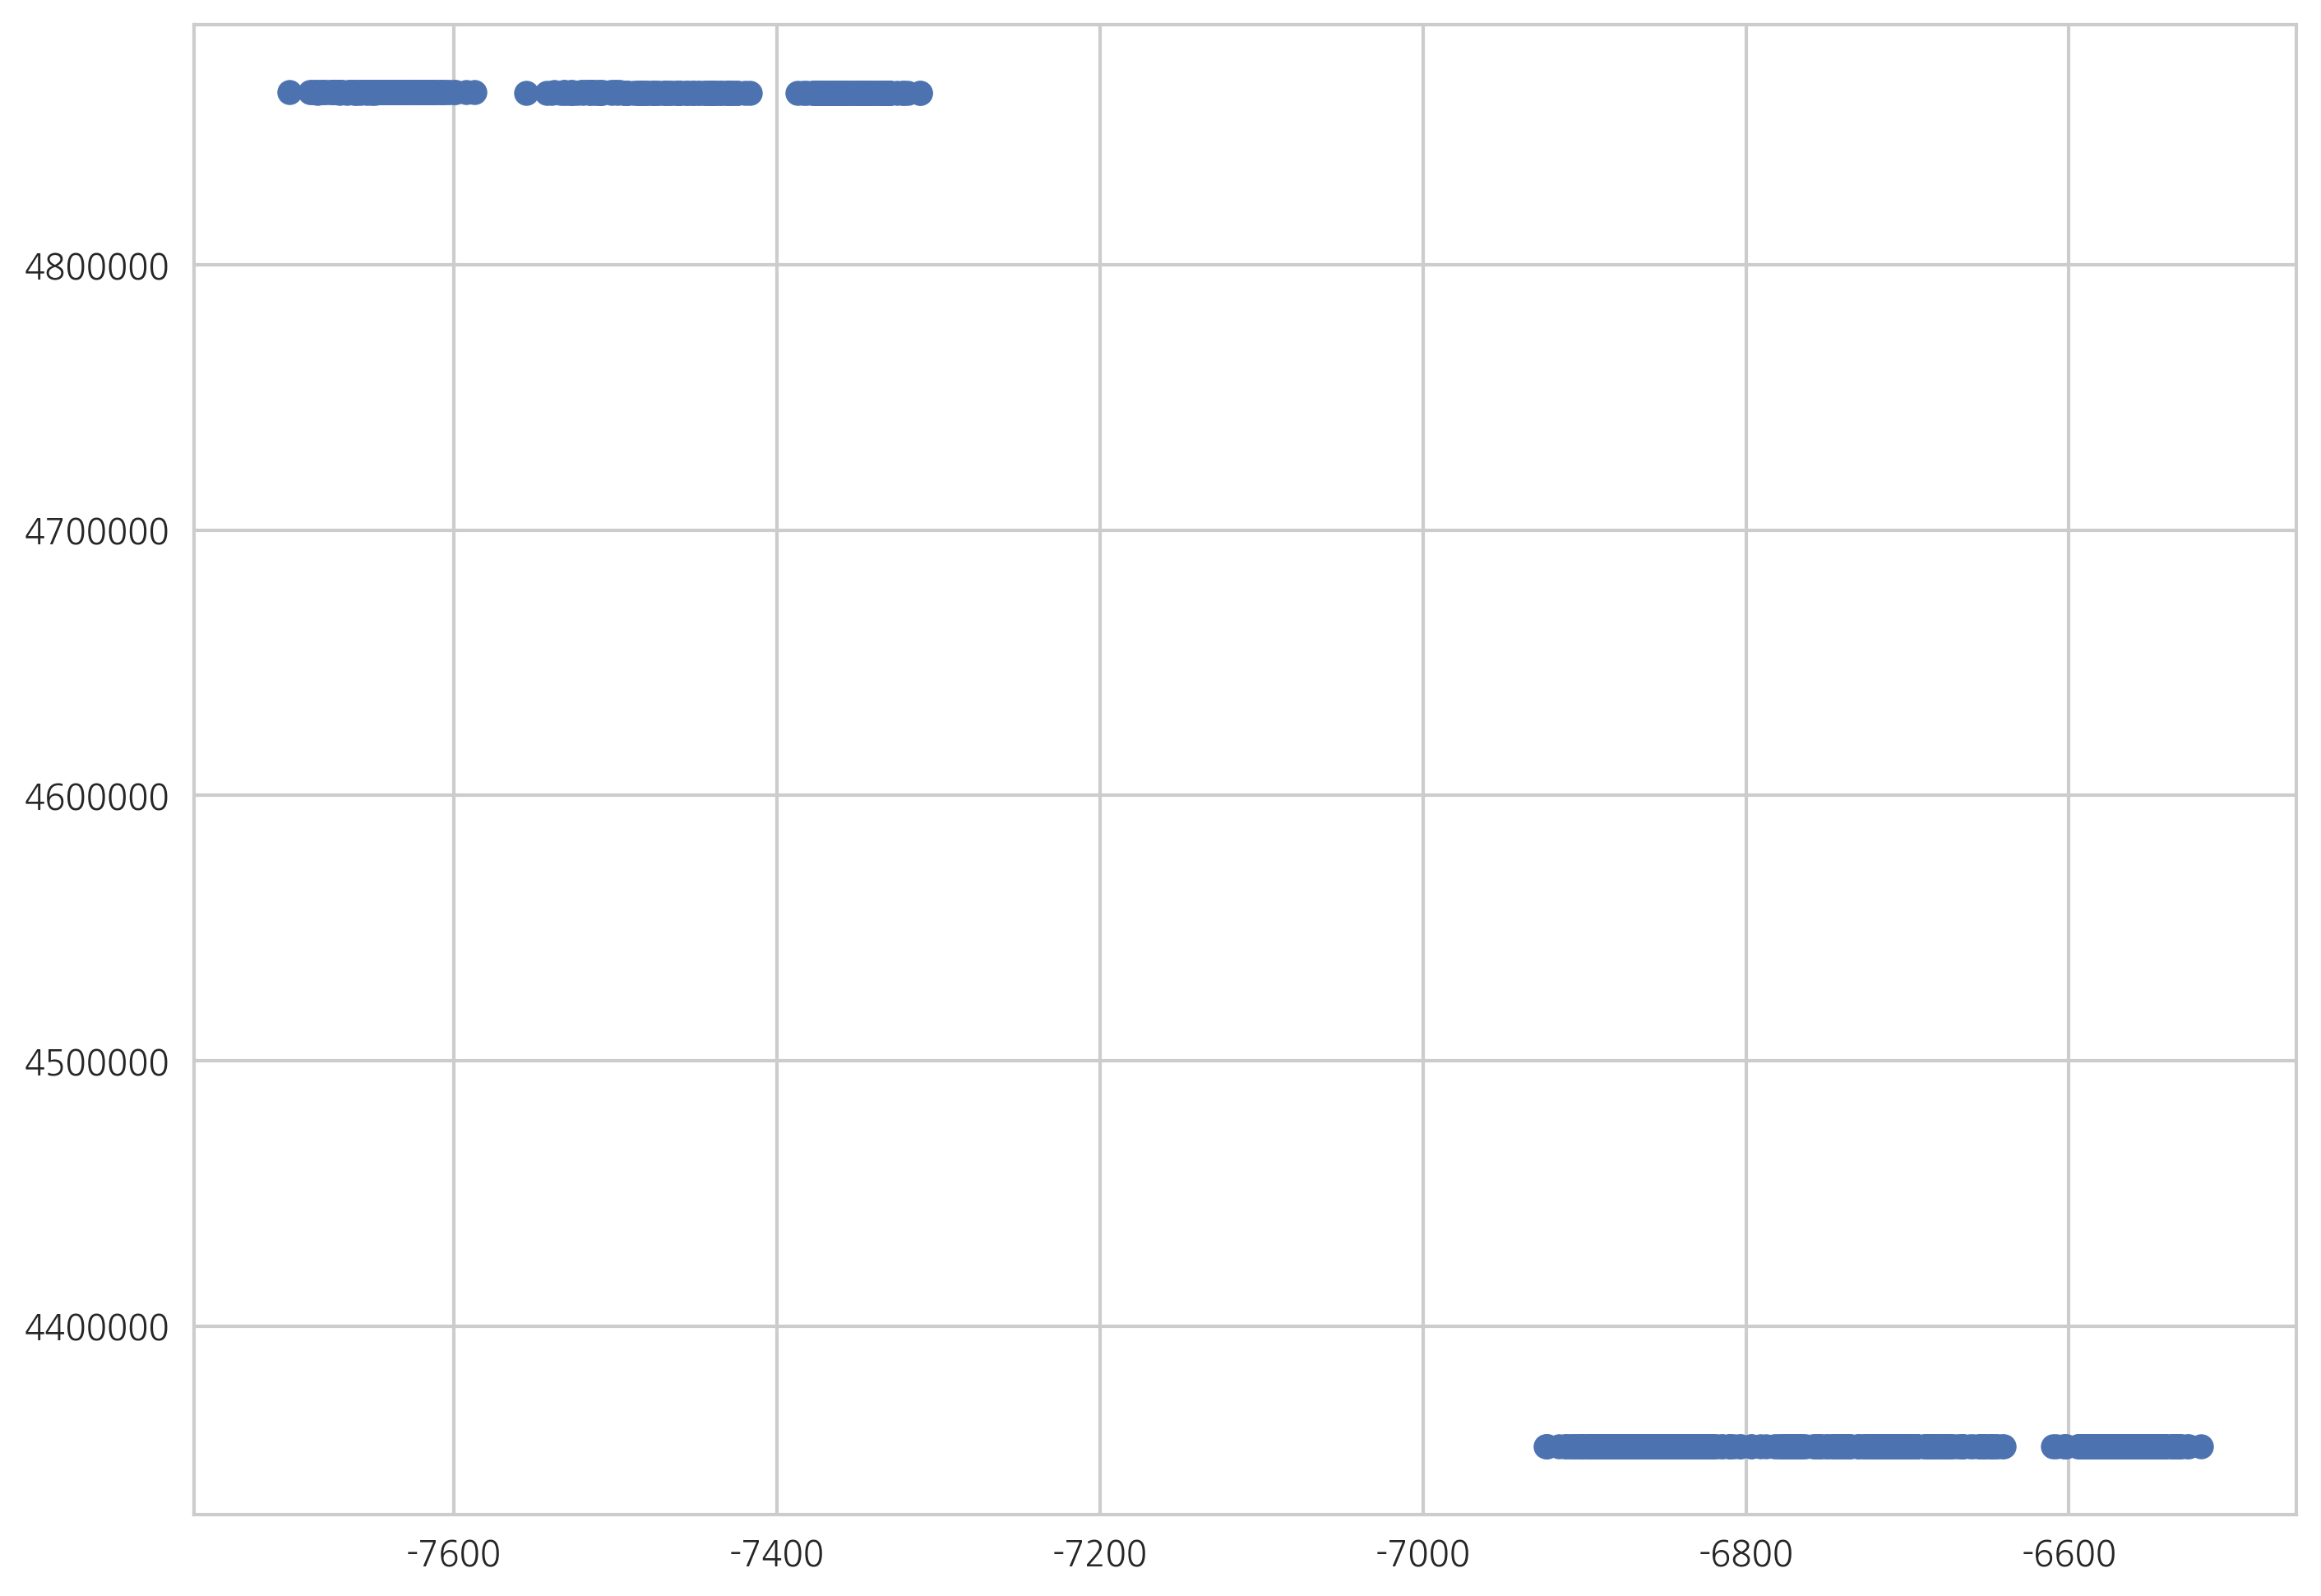

In [81]:
plt.scatter(validation_y[0], validation_y[1])